C:\Users\Howard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


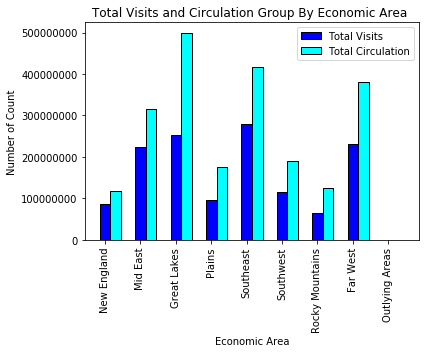

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv("PLS_FY2016_AE_pupld16a.csv", encoding="cp1252")
#subset the dataset 
df_test1 = df.loc[:,("TOTINCM","TOTCIR","TOTATTEN","KIDATTEN","KIDPRO","TOTPRO","VISITS","OBEREG" )]
df_test1.replace(-3, np.nan, inplace = True)
df_test1.dropna(inplace = True)
df_test1["KIDPROPERCENT"] = df_test1["KIDPRO"]/df_test1["TOTPRO"]
df_test1["KIDATTENPERCENT"]  = df_test1["KIDATTEN"]/df_test1["TOTATTEN"]
df_test1.fillna(0, inplace = True)
df_test1 = df_test1[(df_test1["KIDPROPERCENT"] != 1) & (df_test1["KIDATTENPERCENT"] != 1)]
df_test1.sort_values(by = ['TOTINCM'], ascending = False).head(5)

# get the sum of counts for two indexes group by OBEREG
gp1 = df_test1[["OBEREG",'TOTCIR','VISITS']].groupby("OBEREG").agg("sum")

# PLOT THE BOX PLOT
from matplotlib.ticker import FormatStrFormatter
barWidth = 0.3
r1 = np.arange(len(gp1.index.values))
r2 = [x + barWidth for x in r1]

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(r1, gp1['VISITS'].values ,width = barWidth, \
        color = 'blue', edgecolor = 'black', label = "Total Visits")
rects2 = ax.bar(r2, gp1['TOTCIR'].values ,width = barWidth, \
        color = 'cyan', edgecolor = 'black', label = "Total Circulation")

new_labels = ['New England', 'Mid East',\
              'Great Lakes', 'Plains',\
              'Southeast',\
              'Southwest', 'Rocky Mountains',\
              'Far West', 'Outlying Areas']
ax.set_xticks(r1)
ax.set_xticklabels(new_labels, rotation=90)
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.xlabel('Economic Area')
plt.ylabel('Number of Count')
plt.title("Total Visits and Circulation Group By Economic Area ")
plt.legend()
plt.show()